In [1]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [2]:
# Abrir el archivo .csv
file_path = 'michelin_my_maps.csv'
data = pd.read_csv(file_path)


In [3]:
data

,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,GreenStar,FacilitiesAndServices,Description
0,Frantzén,"Klara Norra Kyrkogata 26, Stockholm, 111 22, S...","Stockholm, Sweden",€€€€,Modern Cuisine,18.059757,59.334167,4.682086e+08,https://guide.michelin.com/en/stockholm-region...,https://www.restaurantfrantzen.com/,3 Stars,0,"Air conditioning,Counter dining,Interesting wi...",World-renowned Chef Björn Frantzén provides a ...
1,noma,"Refshalevej 96, Copenhagen, 1432 K, Denmark","Copenhagen, Denmark",€€€€,Creative,12.610618,55.683312,4.532963e+09,https://guide.michelin.com/en/capital-region/c...,https://noma.dk,3 Stars,1,"Garden or park,Great view,Wheelchair access",This elegant yet relaxed waterside restaurant ...
2,Jordnær,"Gentoftegade 29, Gentofte, 2800, Denmark","Gentofte, Denmark",€€€€,Creative,12.541235,55.748142,4.522408e+09,https://guide.michelin.com/en/capital-region/g...,http://www.restaurantjordnaer.dk/,3 Stars,0,"Car park,Interesting wine list",Chef-Owner Eric Kragh Vildgaard is the driving...
3,Geranium,"Per Henrik Lings Allé, Parken National Stadium...","Copenhagen, Denmark",€€€€,"Creative, Contemporary",12.572529,55.704085,4.569960e+09,https://guide.michelin.com/en/capital-region/c...,https://www.geranium.dk/,3 Stars,0,"Air conditioning,Car park,Great view,Interesti...",Located on the 8th floor of the National Footb...
4,RE-NAA,"Nordbøgata 8, Stavanger, 4006, Norway","Stavanger, Norway",€€€€,"Creative, Seafood",5.730845,58.973971,4.751551e+09,https://guide.michelin.com/en/rogaland/stavang...,https://www.restaurantrenaa.no/,3 Stars,0,"Air conditioning,Interesting wine list,Wheelch...",The kitchen quite literally takes centre stage...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17063,Kampa Park,"Na Kampe 8b, Malá Strana, Prague, 118 00, Czec...","Prague, Czechia",€€€,Modern Cuisine,14.408992,50.087038,4.202968e+11,https://guide.michelin.com/en/prague/prague/re...,http://kampapark.com/en/,Selected Restaurants,0,"Air conditioning,Booking essential - dinner,Gr...",Kampa Park is stunningly located by the water’...
17064,La Veranda,"Elišky Krásnohorské 2, Prague, 110 00, Czech R...","Prague, Czechia",€€,Mediterranean Cuisine,14.419907,50.090262,4.202248e+11,https://guide.michelin.com/en/prague/prague/re...,https://www.laveranda.cz,Selected Restaurants,0,Air conditioning,Sit surrounded by books in the colourfully dec...
17065,Taro,"Nádražní 100, Prague, 150 00, Czech Republic","Prague, Czechia",€€€,Asian,14.405710,50.069760,4.207774e+11,https://guide.michelin.com/en/prague/prague/re...,https://www.taro.cz/,Selected Restaurants,0,"Air conditioning,Counter dining",Close to the famous Staropramen Brewery is thi...
17066,Bockem,"Elišky Peškové 1095/5, Prague, 150 00, Czech R...","Prague, Czechia",€€€,"Czech, Contemporary",14.405282,50.077414,4.200770e+12,https://guide.michelin.com/en/prague/prague/re...,https://bockem.cz/,Selected Restaurants,0,Booking essential,There’s something very endearing about this wa...


In [4]:
print(data.head())

       Name                                            Address  \
0  Frantzén  Klara Norra Kyrkogata 26, Stockholm, 111 22, S...   
1      noma        Refshalevej 96, Copenhagen, 1432 K, Denmark   
2   Jordnær           Gentoftegade 29, Gentofte, 2800, Denmark   
3  Geranium  Per Henrik Lings Allé, Parken National Stadium...   
4    RE-NAA              Nordbøgata 8, Stavanger, 4006, Norway   

              Location Price                 Cuisine  Longitude   Latitude  \
0    Stockholm, Sweden  €€€€          Modern Cuisine  18.059757  59.334167   
1  Copenhagen, Denmark  €€€€                Creative  12.610618  55.683312   
2    Gentofte, Denmark  €€€€                Creative  12.541235  55.748142   
3  Copenhagen, Denmark  €€€€  Creative, Contemporary  12.572529  55.704085   
4    Stavanger, Norway  €€€€       Creative, Seafood   5.730845  58.973971   

    PhoneNumber                                                Url  \
0  4.682086e+08  https://guide.michelin.com/en/stockholm-region.

In [5]:
# Quitar columnas que no usare
data.drop(columns = ['PhoneNumber', 'Url',
                   'WebsiteUrl'], inplace=True)

In [6]:
summary = data.describe()
print(summary)

          Longitude      Latitude     GreenStar
count  17068.000000  17068.000000  17068.000000
mean      16.408227     40.468258      0.022147
std       61.202892     13.581687      0.147165
min     -123.719064    -34.626786      0.000000
25%       -0.461269     36.770974      0.000000
50%        6.530253     43.889081      0.000000
75%       14.504924     48.863759      0.000000
max      139.825702     66.166565      1.000000


In [7]:
datalimpia = data.dropna(axis = 0)
datalimpia.shape

(16192, 11)

In [8]:
datalimpia['Name'].astype('str')
datalimpia['Location'].astype('str')
datalimpia['Price'].astype('str')
datalimpia['Cuisine'].astype('str')
datalimpia['Award'].astype('str')
datalimpia

,Name,Address,Location,Price,Cuisine,Longitude,Latitude,Award,GreenStar,FacilitiesAndServices,Description
0,Frantzén,"Klara Norra Kyrkogata 26, Stockholm, 111 22, S...","Stockholm, Sweden",€€€€,Modern Cuisine,18.059757,59.334167,3 Stars,0,"Air conditioning,Counter dining,Interesting wi...",World-renowned Chef Björn Frantzén provides a ...
1,noma,"Refshalevej 96, Copenhagen, 1432 K, Denmark","Copenhagen, Denmark",€€€€,Creative,12.610618,55.683312,3 Stars,1,"Garden or park,Great view,Wheelchair access",This elegant yet relaxed waterside restaurant ...
2,Jordnær,"Gentoftegade 29, Gentofte, 2800, Denmark","Gentofte, Denmark",€€€€,Creative,12.541235,55.748142,3 Stars,0,"Car park,Interesting wine list",Chef-Owner Eric Kragh Vildgaard is the driving...
3,Geranium,"Per Henrik Lings Allé, Parken National Stadium...","Copenhagen, Denmark",€€€€,"Creative, Contemporary",12.572529,55.704085,3 Stars,0,"Air conditioning,Car park,Great view,Interesti...",Located on the 8th floor of the National Footb...
4,RE-NAA,"Nordbøgata 8, Stavanger, 4006, Norway","Stavanger, Norway",€€€€,"Creative, Seafood",5.730845,58.973971,3 Stars,0,"Air conditioning,Interesting wine list,Wheelch...",The kitchen quite literally takes centre stage...
...,...,...,...,...,...,...,...,...,...,...,...
17063,Kampa Park,"Na Kampe 8b, Malá Strana, Prague, 118 00, Czec...","Prague, Czechia",€€€,Modern Cuisine,14.408992,50.087038,Selected Restaurants,0,"Air conditioning,Booking essential - dinner,Gr...",Kampa Park is stunningly located by the water’...
17064,La Veranda,"Elišky Krásnohorské 2, Prague, 110 00, Czech R...","Prague, Czechia",€€,Mediterranean Cuisine,14.419907,50.090262,Selected Restaurants,0,Air conditioning,Sit surrounded by books in the colourfully dec...
17065,Taro,"Nádražní 100, Prague, 150 00, Czech Republic","Prague, Czechia",€€€,Asian,14.405710,50.069760,Selected Restaurants,0,"Air conditioning,Counter dining",Close to the famous Staropramen Brewery is thi...
17066,Bockem,"Elišky Peškové 1095/5, Prague, 150 00, Czech R...","Prague, Czechia",€€€,"Czech, Contemporary",14.405282,50.077414,Selected Restaurants,0,Booking essential,There’s something very endearing about this wa...


In [9]:
# datalimpia.loc[:,'Award'] = datalimpia['Award'].astype(str).str[0]

In [10]:
currency = pd.Series([x[0] for x in datalimpia['Price']])
currency

0        €
1        €
2        €
3        €
4        €
        ..
16187    €
16188    €
16189    €
16190    €
16191    €
Length: 16192, dtype: object

In [11]:
datalimpia = datalimpia.copy()
datalimpia.loc[:,'Currency'] = currency.values
datalimpia['Currency'].describe()

count     16192
unique        8
top           €
freq       9800
Name: Currency, dtype: object

In [12]:
priceLevel = pd.Series([len(x) for x in datalimpia['Price']])
priceLevel

0        4
1        4
2        4
3        4
4        4
        ..
16187    3
16188    2
16189    3
16190    3
16191    1
Length: 16192, dtype: int64

In [13]:
datalimpia = datalimpia.copy()
datalimpia.loc[:,'Price Level'] = priceLevel.values
datalimpia.drop(columns = ['Price'], inplace=True)
datalimpia['Price Level'].describe()

count    16192.000000
mean         2.607399
std          0.882905
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: Price Level, dtype: float64

In [14]:
datalimpia[['City','Country']] = datalimpia.Location.str.split(', ', expand=True)
datalimpia['Country'].fillna(datalimpia['City'], inplace=True)
datalimpia.drop(columns = ['Location'], inplace=True)
datalimpia

C:\Users\Edgar\AppData\Local\Temp\ipykernel_12100\3508565098.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datalimpia['Country'].fillna(datalimpia['City'], inplace=True)


,Name,Address,Cuisine,Longitude,Latitude,Award,GreenStar,FacilitiesAndServices,Description,Currency,Price Level,City,Country
0,Frantzén,"Klara Norra Kyrkogata 26, Stockholm, 111 22, S...",Modern Cuisine,18.059757,59.334167,3 Stars,0,"Air conditioning,Counter dining,Interesting wi...",World-renowned Chef Björn Frantzén provides a ...,€,4,Stockholm,Sweden
1,noma,"Refshalevej 96, Copenhagen, 1432 K, Denmark",Creative,12.610618,55.683312,3 Stars,1,"Garden or park,Great view,Wheelchair access",This elegant yet relaxed waterside restaurant ...,€,4,Copenhagen,Denmark
2,Jordnær,"Gentoftegade 29, Gentofte, 2800, Denmark",Creative,12.541235,55.748142,3 Stars,0,"Car park,Interesting wine list",Chef-Owner Eric Kragh Vildgaard is the driving...,€,4,Gentofte,Denmark
3,Geranium,"Per Henrik Lings Allé, Parken National Stadium...","Creative, Contemporary",12.572529,55.704085,3 Stars,0,"Air conditioning,Car park,Great view,Interesti...",Located on the 8th floor of the National Footb...,€,4,Copenhagen,Denmark
4,RE-NAA,"Nordbøgata 8, Stavanger, 4006, Norway","Creative, Seafood",5.730845,58.973971,3 Stars,0,"Air conditioning,Interesting wine list,Wheelch...",The kitchen quite literally takes centre stage...,€,4,Stavanger,Norway
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17063,Kampa Park,"Na Kampe 8b, Malá Strana, Prague, 118 00, Czec...",Modern Cuisine,14.408992,50.087038,Selected Restaurants,0,"Air conditioning,Booking essential - dinner,Gr...",Kampa Park is stunningly located by the water’...,€,3,Prague,Czechia
17064,La Veranda,"Elišky Krásnohorské 2, Prague, 110 00, Czech R...",Mediterranean Cuisine,14.419907,50.090262,Selected Restaurants,0,Air conditioning,Sit surrounded by books in the colourfully dec...,€,2,Prague,Czechia
17065,Taro,"Nádražní 100, Prague, 150 00, Czech Republic",Asian,14.405710,50.069760,Selected Restaurants,0,"Air conditioning,Counter dining",Close to the famous Staropramen Brewery is thi...,€,3,Prague,Czechia
17066,Bockem,"Elišky Peškové 1095/5, Prague, 150 00, Czech R...","Czech, Contemporary",14.405282,50.077414,Selected Restaurants,0,Booking essential,There’s something very endearing about this wa...,€,3,Prague,Czechia


## EDA  Exploratory Data Analysis

In [15]:
uniqueCuisines = datalimpia['Cuisine'].unique()
datalimpia['Cuisine'].value_counts()

Cuisine
Modern Cuisine                           2519
Traditional Cuisine                       731
Creative                                  586
Japanese                                  511
Contemporary                              437
                                         ... 
Modern Cuisine, German                      1
Asian Influences, Contemporary              1
Spanish Contemporary, Modern Cuisine        1
Japanese Contemporary, South American       1
Czech, Contemporary                         1
Name: count, Length: 1560, dtype: int64

In [16]:
uniqueCuisines[-30:]

array(['Teochew, Cantonese', 'Californian, Asian Contemporary',
       'Modern Cuisine, Polish', 'Traditional Cuisine, Polish',
       'Meats and Grills, Seafood', 'Polish, Innovative',
       'Creative, Polish', 'Croatian', 'Mediterranean Cuisine, Croatian',
       'Asian Influences, Asian and Western', 'Croatian, Contemporary',
       'Mediterranean Cuisine, Meats and Grills', 'Seafood, Asian',
       'South African, Modern Cuisine', 'Asian Influences, World Cuisine',
       'Modern French, Asian Influences', 'Portuguese, Asian Influences',
       'South American, Asian', 'Modern Cuisine, Greek',
       'Chinese, Indonesian', 'World Cuisine, Modern French',
       'Meats and Grills, Creative',
       'Modern Cuisine, Cuisine from the Marches',
       'Modern French, Vegetarian', 'Modern British, International',
       'Creative French, Asian Influences', 'Modern French, Home Cooking',
       'Scandinavian, Country cooking', 'Modern Cuisine, Austrian',
       'Czech, Contemporary'], d

In [17]:
newCuisine = [x.split(',')[0] if ',' in x else x for x in datalimpia['Cuisine']]
newCuisine[-30:]

['Modern Cuisine',
 'Polish',
 'Modern Cuisine',
 'Modern Cuisine',
 'International',
 'Polish',
 'Modern Cuisine',
 'Modern Cuisine',
 'Meats and Grills',
 'Seafood',
 'French',
 'Italian',
 'Modern Cuisine',
 'Czech',
 'Traditional Cuisine',
 'Modern Cuisine',
 'Asian',
 'Modern Cuisine',
 'Modern Cuisine',
 'Meats and Grills',
 'Italian',
 'Modern Cuisine',
 'French',
 'Japanese',
 'Italian',
 'Modern Cuisine',
 'Mediterranean Cuisine',
 'Asian',
 'Czech',
 'Italian']

In [18]:
datalimpia['Cuisine'] = newCuisine

In [19]:
uniqueCuisines = datalimpia['Cuisine'].unique()
datalimpia['Cuisine'].value_counts()

Cuisine
Modern Cuisine               3074
Creative                      949
Traditional Cuisine           897
Contemporary                  798
Japanese                      706
                             ... 
Duck Specialities               1
Xinjiang                        1
Singaporean and Malaysian       1
Tibetan                         1
Yakiniku                        1
Name: count, Length: 261, dtype: int64

In [20]:
datalimpia

,Name,Address,Cuisine,Longitude,Latitude,Award,GreenStar,FacilitiesAndServices,Description,Currency,Price Level,City,Country
0,Frantzén,"Klara Norra Kyrkogata 26, Stockholm, 111 22, S...",Modern Cuisine,18.059757,59.334167,3 Stars,0,"Air conditioning,Counter dining,Interesting wi...",World-renowned Chef Björn Frantzén provides a ...,€,4,Stockholm,Sweden
1,noma,"Refshalevej 96, Copenhagen, 1432 K, Denmark",Creative,12.610618,55.683312,3 Stars,1,"Garden or park,Great view,Wheelchair access",This elegant yet relaxed waterside restaurant ...,€,4,Copenhagen,Denmark
2,Jordnær,"Gentoftegade 29, Gentofte, 2800, Denmark",Creative,12.541235,55.748142,3 Stars,0,"Car park,Interesting wine list",Chef-Owner Eric Kragh Vildgaard is the driving...,€,4,Gentofte,Denmark
3,Geranium,"Per Henrik Lings Allé, Parken National Stadium...",Creative,12.572529,55.704085,3 Stars,0,"Air conditioning,Car park,Great view,Interesti...",Located on the 8th floor of the National Footb...,€,4,Copenhagen,Denmark
4,RE-NAA,"Nordbøgata 8, Stavanger, 4006, Norway",Creative,5.730845,58.973971,3 Stars,0,"Air conditioning,Interesting wine list,Wheelch...",The kitchen quite literally takes centre stage...,€,4,Stavanger,Norway
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17063,Kampa Park,"Na Kampe 8b, Malá Strana, Prague, 118 00, Czec...",Modern Cuisine,14.408992,50.087038,Selected Restaurants,0,"Air conditioning,Booking essential - dinner,Gr...",Kampa Park is stunningly located by the water’...,€,3,Prague,Czechia
17064,La Veranda,"Elišky Krásnohorské 2, Prague, 110 00, Czech R...",Mediterranean Cuisine,14.419907,50.090262,Selected Restaurants,0,Air conditioning,Sit surrounded by books in the colourfully dec...,€,2,Prague,Czechia
17065,Taro,"Nádražní 100, Prague, 150 00, Czech Republic",Asian,14.405710,50.069760,Selected Restaurants,0,"Air conditioning,Counter dining",Close to the famous Staropramen Brewery is thi...,€,3,Prague,Czechia
17066,Bockem,"Elišky Peškové 1095/5, Prague, 150 00, Czech R...",Czech,14.405282,50.077414,Selected Restaurants,0,Booking essential,There’s something very endearing about this wa...,€,3,Prague,Czechia


In [21]:
datalimpia['Award'].describe()

count                    16192
unique                       5
top       Selected Restaurants
freq                      9684
Name: Award, dtype: object

In [22]:
datalimpia['Award'].value_counts()

Award
Selected Restaurants    9684
Bib Gourmand            3032
1 Star                  2841
2 Stars                  490
3 Stars                  145
Name: count, dtype: int64

In [23]:
datalimpia = datalimpia[datalimpia['Award'] != 'M']

Bib Gourmand: "Exceptionally good food at moderate prices"
1 Michelin Star: "High quality cooking, Worth a stop!"
2 Michelin Star: "Excellent cooking, Worth a detour!"
3 Michelin Star: "Exceptional cooking, Worth a special journey!"
SELECTED RESTAURANTS ES QUE TUVO IUNA ESTRELLA PERO SE LA QUITARON

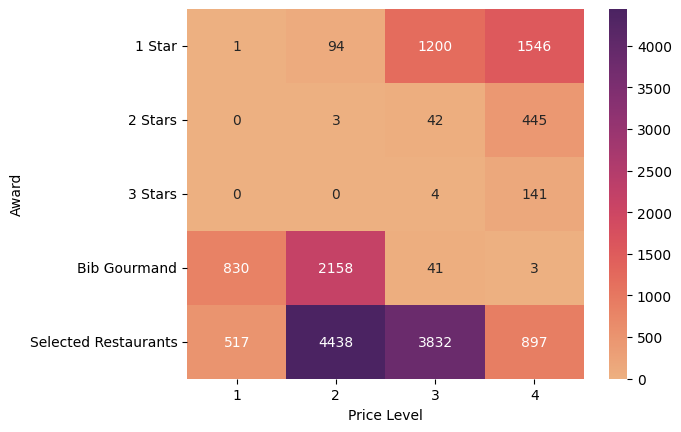

In [24]:
price_award = pd.crosstab(datalimpia['Award'], datalimpia['Price Level'])
sns.heatmap(price_award, annot=True, cmap="flare", fmt='d')
plt.show()

In [25]:
datalimpia.loc[(datalimpia['Price Level'] == 4) & (datalimpia['Award'] == 'B')]

,Name,Address,Cuisine,Longitude,Latitude,Award,GreenStar,FacilitiesAndServices,Description,Currency,Price Level,City,Country


In [26]:
top10cuisinesBG = datalimpia.groupby('Cuisine')['Name'].count().sort_values(ascending=False)[:10]
top10cuisinesBG

Cuisine
Modern Cuisine           3074
Creative                  949
Traditional Cuisine       897
Contemporary              798
Japanese                  706
Italian                   602
Seafood                   567
French                    445
Country cooking           391
Mediterranean Cuisine     379
Name: Name, dtype: int64

In [27]:
top10cuisinesStars = datalimpia.groupby('Cuisine')['Name'].count().sort_values(ascending=False)[:10]
top10cuisinesStars

Cuisine
Modern Cuisine           3074
Creative                  949
Traditional Cuisine       897
Contemporary              798
Japanese                  706
Italian                   602
Seafood                   567
French                    445
Country cooking           391
Mediterranean Cuisine     379
Name: Name, dtype: int64

In [28]:
datalimpia

,Name,Address,Cuisine,Longitude,Latitude,Award,GreenStar,FacilitiesAndServices,Description,Currency,Price Level,City,Country
0,Frantzén,"Klara Norra Kyrkogata 26, Stockholm, 111 22, S...",Modern Cuisine,18.059757,59.334167,3 Stars,0,"Air conditioning,Counter dining,Interesting wi...",World-renowned Chef Björn Frantzén provides a ...,€,4,Stockholm,Sweden
1,noma,"Refshalevej 96, Copenhagen, 1432 K, Denmark",Creative,12.610618,55.683312,3 Stars,1,"Garden or park,Great view,Wheelchair access",This elegant yet relaxed waterside restaurant ...,€,4,Copenhagen,Denmark
2,Jordnær,"Gentoftegade 29, Gentofte, 2800, Denmark",Creative,12.541235,55.748142,3 Stars,0,"Car park,Interesting wine list",Chef-Owner Eric Kragh Vildgaard is the driving...,€,4,Gentofte,Denmark
3,Geranium,"Per Henrik Lings Allé, Parken National Stadium...",Creative,12.572529,55.704085,3 Stars,0,"Air conditioning,Car park,Great view,Interesti...",Located on the 8th floor of the National Footb...,€,4,Copenhagen,Denmark
4,RE-NAA,"Nordbøgata 8, Stavanger, 4006, Norway",Creative,5.730845,58.973971,3 Stars,0,"Air conditioning,Interesting wine list,Wheelch...",The kitchen quite literally takes centre stage...,€,4,Stavanger,Norway
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17063,Kampa Park,"Na Kampe 8b, Malá Strana, Prague, 118 00, Czec...",Modern Cuisine,14.408992,50.087038,Selected Restaurants,0,"Air conditioning,Booking essential - dinner,Gr...",Kampa Park is stunningly located by the water’...,€,3,Prague,Czechia
17064,La Veranda,"Elišky Krásnohorské 2, Prague, 110 00, Czech R...",Mediterranean Cuisine,14.419907,50.090262,Selected Restaurants,0,Air conditioning,Sit surrounded by books in the colourfully dec...,€,2,Prague,Czechia
17065,Taro,"Nádražní 100, Prague, 150 00, Czech Republic",Asian,14.405710,50.069760,Selected Restaurants,0,"Air conditioning,Counter dining",Close to the famous Staropramen Brewery is thi...,€,3,Prague,Czechia
17066,Bockem,"Elišky Peškové 1095/5, Prague, 150 00, Czech R...",Czech,14.405282,50.077414,Selected Restaurants,0,Booking essential,There’s something very endearing about this wa...,€,3,Prague,Czechia


In [29]:
datalimpia.to_csv('Analisismichelin.csv', index=False)

# ANALISIS CON GRAFICAS USA

In [30]:
# Filtrar los datos para incluir solo las filas donde country es USA
mex_data = datalimpia[datalimpia['Country'] == 'Mexico']

# Mostrar las primeras filas del DataFrame filtrado
print(mex_data.head())

                           Name  \
169                       Pujol   
170                   Quintonil   
737  Taquería El Califa de León   
738                          Em   
739                     Sud 777   

                                               Address       Cuisine  \
169  Tennyson 133, Polanco, Miguel Hidalgo, 11550, ...       Mexican   
170  Isaac Newton, 55, Polanco, Miguel Hidalgo, 115...  Contemporary   
737  Av. Ribera De San Cosme 56, San Rafael, Cuauht...       Mexican   
738  Tonalá 133, Roma Norte, Cuauhtémoc, 06700, Mexico       Mexican   
739  Blvd. De La Luz, 777, Jardines del Pedregal , ...      Creative   

     Longitude   Latitude    Award  GreenStar  \
169 -99.194784  19.432423  2 Stars          0   
170 -99.191697  19.431017  2 Stars          0   
737 -99.159241  19.441143   1 Star          0   
738 -99.161981  19.415294   1 Star          0   
739 -99.209359  19.309135   1 Star          0   

                                 FacilitiesAndServices  \
169

In [31]:
mex_data.to_csv('mex_data.csv', index=False)

In [32]:
# Filtrar los datos para incluir solo las filas donde country es USA
usa_data = datalimpia[datalimpia['Country'] == 'USA']

# Mostrar las primeras filas del DataFrame filtrado
print(usa_data.head())

                             Name                                   Address  \
117  The Inn at Little Washington    309 Middle St., Washington, 22747, USA   
118                        Per Se  10 Columbus Circle, New York, 10019, USA   
119                  Le Bernardin     155 W. 51st St., New York, 10019, USA   
120           Eleven Madison Park     11 Madison Ave., New York, 10010, USA   
121                          Masa  10 Columbus Circle, New York, 10019, USA   

          Cuisine  Longitude   Latitude    Award  GreenStar  \
117      American -78.159535  38.713477  3 Stars          1   
118  Contemporary -73.982588  40.768054  3 Stars          0   
119       Seafood -73.982230  40.761770  3 Stars          0   
120         Vegan -73.987241  40.741554  3 Stars          0   
121      Japanese -73.982340  40.768190  3 Stars          0   

                                 FacilitiesAndServices  \
117  Air conditioning,Interesting wine list,Restaur...   
118  Air conditioning,Great vi

In [33]:
usa_data.to_csv('usa_data.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'usa_data.csv'

In [ ]:
print(usa_data.describe())

         Longitude     Latitude    GreenStar  Price Level
count  1475.000000  1475.000000  1475.000000  1475.000000
mean    -95.490825    37.143372     0.013559     2.808814
std      20.715889     4.352004     0.115692     0.903816
min    -123.719064    25.687032     0.000000     1.000000
25%    -118.365842    34.053230     0.000000     2.000000
50%     -87.632890    38.406103     0.000000     3.000000
75%     -74.005552    40.729197     0.000000     4.000000
max     -73.574934    41.980370     1.000000     4.000000


In [ ]:
# Contar el número de ocurrencias por city
city_counts = usa_data['City'].value_counts()

# Tomar solo el top 20 de las ciudades
top_20_cities = city_counts.head(20)

top_20_cities

City
New York             373
Chicago              143
Washington           117
Los Angeles          109
San Francisco         96
Miami                 44
Orlando               44
Atlanta               39
San Diego             29
Tampa                 27
Oakland               21
Denver                19
Santa Monica          18
Miami Beach           16
Sacramento            14
Santa Barbara         12
Beverly Hills         11
Berkeley               9
Palo Alto              8
Carmel-by-the-Sea      8
Name: count, dtype: int64

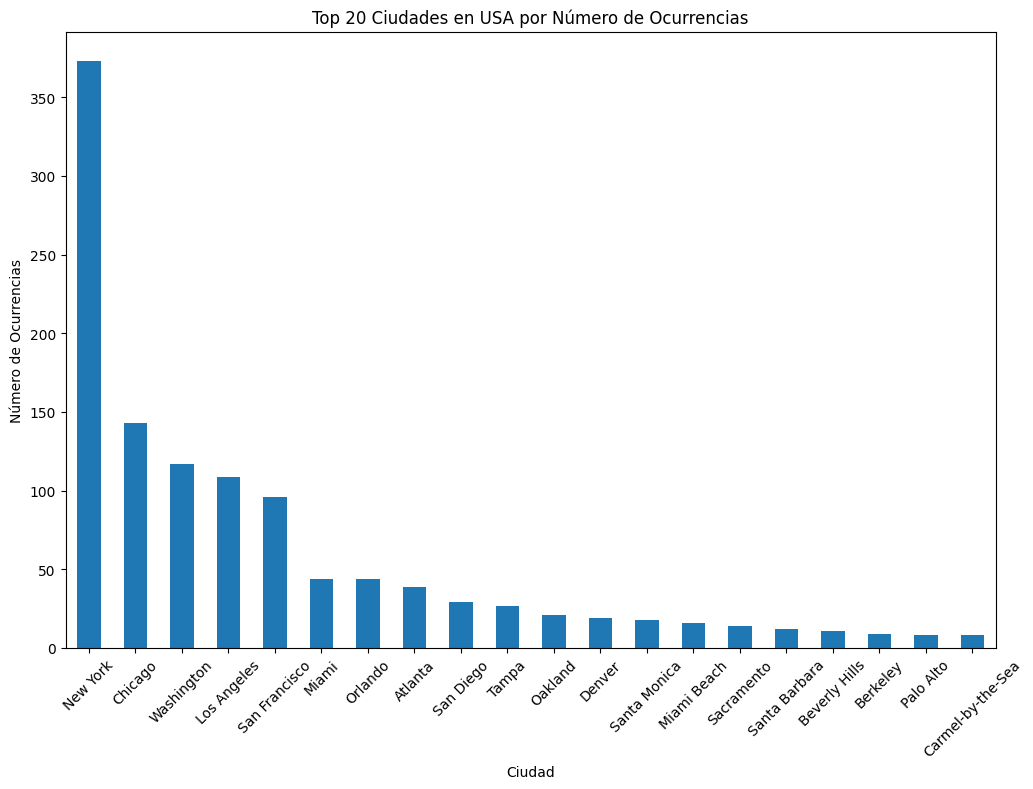

In [ ]:
# Contar el número de ocurrencias por city
city_counts = usa_data['City'].value_counts()

# Tomar solo el top 20 de las ciudades
top_20_cities = city_counts.head(20)

# Crear una gráfica de barras para mostrar las ocurrencias por city
plt.figure(figsize=(12, 8))
top_20_cities.plot(kind='bar')
plt.title('Top 20 Ciudades en USA por Número de Ocurrencias')
plt.xlabel('Ciudad')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45)
plt.show()

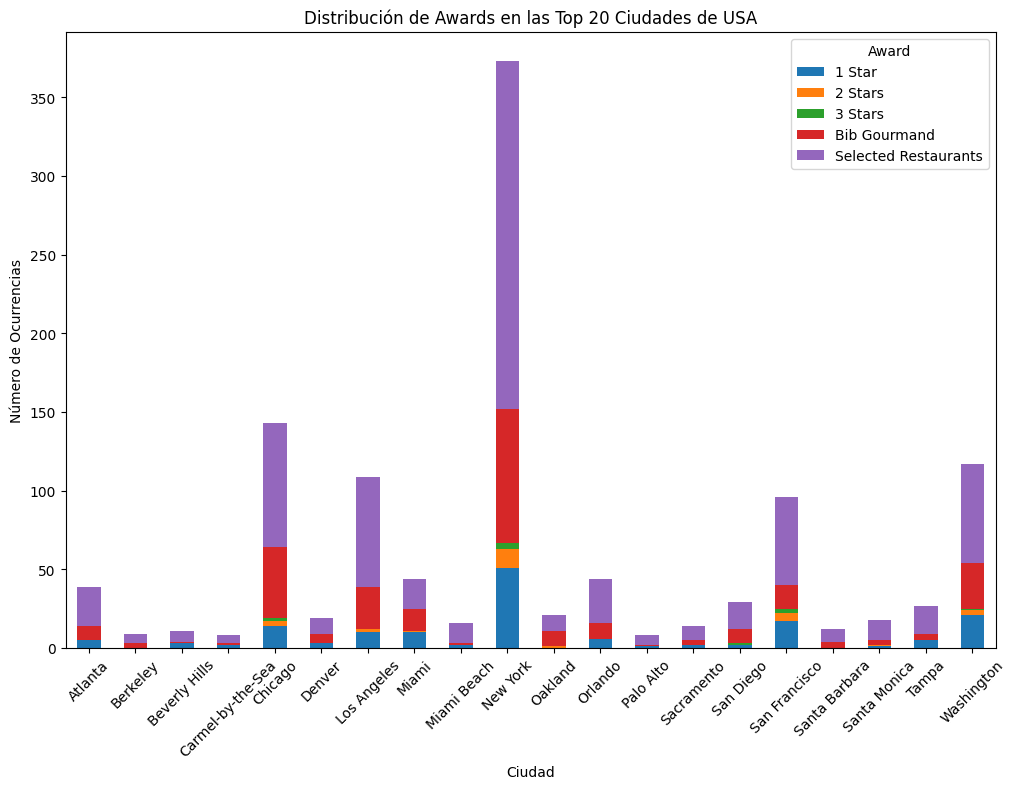

In [ ]:
# Contar el número de ocurrencias por City
city_counts = usa_data['City'].value_counts()

# Tomar solo el top 20 de las ciudades
top_20_cities = city_counts.head(20).index

# Filtrar los datos para incluir solo las filas con las ciudades del top 20
top_20_data = usa_data[usa_data['City'].isin(top_20_cities)]

# Crear una tabla pivot para contar las ocurrencias de Award por City
pivot_table = top_20_data.pivot_table(index='City', columns='Award', aggfunc='size', fill_value=0)

# Crear una gráfica de barras apiladas para mostrar las ocurrencias por Award y City
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribución de Awards en las Top 20 Ciudades de USA')
plt.xlabel('Ciudad')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45)
plt.legend(title='Award')
plt.show()

In [ ]:
 # Crear una tabla pivot para contar las ocurrencias de Award por city
pivot_table = top_20_data.pivot_table(index='City', columns='Award', aggfunc='size', fill_value=0)

pivot_table

Award,1 Star,2 Stars,3 Stars,Bib Gourmand,Selected Restaurants
City,,,,,
Atlanta,5,0,0,9,25
Berkeley,0,0,0,3,6
Beverly Hills,3,0,0,1,7
Carmel-by-the-Sea,2,0,0,1,5
Chicago,14,3,2,45,79
Denver,3,0,0,6,10
Los Angeles,10,2,0,27,70
Miami,10,1,0,14,19
Miami Beach,2,0,0,1,13


In [ ]:
# Contar el número de ocurrencias por city
city_counts = usa_data['City'].value_counts()

# Tomar solo el top 20 de las ciudades
top_20_cities = city_counts.head(20).index

# Filtrar los datos para incluir solo las filas con las ciudades del top 20
top_20_data = usa_data[usa_data['City'].isin(top_20_cities)]

# Crear una tabla pivot para contar las ocurrencias de Price Level por city
pivot_table_price = top_20_data.pivot_table(index='City', columns='Price Level', aggfunc='size', fill_value=0)

# Mostrar la tabla
print(pivot_table_price)


Price Level         1    2    3    4
City                                
Atlanta             2   18   10    9
Berkeley            3    4    1    1
Beverly Hills       0    1    1    9
Carmel-by-the-Sea   0    2    4    2
Chicago             4   68   35   36
Denver              0    6    7    6
Los Angeles         7   38   34   30
Miami               2   15   16   11
Miami Beach         1    3    7    5
New York           17  122  113  121
Oakland             5   11    4    1
Orlando             1   22    9   12
Palo Alto           0    2    5    1
Sacramento          1    5    5    3
San Diego           4   12    8    5
San Francisco       3   26   32   35
Santa Barbara       1    6    1    4
Santa Monica        0    4    9    5
Tampa               1   12    7    7
Washington          4   47   34   32


In [ ]:
# Crear una tabla pivot para contar las ocurrencias de GreenStar por city
pivot_table_greenstar = top_20_data.pivot_table(index='City', columns='GreenStar', aggfunc='size', fill_value=0)

# Mostrar la tabla
print(pivot_table_greenstar)


GreenStar            0  1
City                     
Atlanta             38  1
Berkeley             9  0
Beverly Hills       11  0
Carmel-by-the-Sea    8  0
Chicago            142  1
Denver              17  2
Los Angeles        108  1
Miami               43  1
Miami Beach         16  0
New York           371  2
Oakland             21  0
Orlando             44  0
Palo Alto            8  0
Sacramento          14  0
San Diego           29  0
San Francisco       93  3
Santa Barbara       12  0
Santa Monica        18  0
Tampa               27  0
Washington         116  1


In [ ]:
# top 20 cuisine 

In [ ]:
# Contar el número de ocurrencias por cuisine
cuisine_counts = usa_data['Cuisine'].value_counts()

# Tomar solo el top 20 de las cocinas
top_20_cuisines = cuisine_counts.head(20).index

# Filtrar los datos para incluir solo las filas con las cocinas del top 20
top_20_cuisine_data = usa_data[usa_data['Cuisine'].isin(top_20_cuisines)]

# Crear una tabla pivot para contar las ocurrencias por cuisine
pivot_table_cuisine = top_20_cuisine_data.pivot_table(index='Cuisine', aggfunc='size')

# Mostrar la tabla
print(pivot_table_cuisine)

Cuisine
American                 123
Asian                     29
Californian               65
Chinese                   72
Contemporary             196
French                    49
Indian                    34
Italian                  121
Japanese                 154
Korean                    39
Mediterranean Cuisine     28
Mexican                   89
Middle Eastern            17
Pizza                     26
Seafood                   35
Southern                  18
Spanish                   23
Steakhouse                38
Thai                      27
Vietnamese                18
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

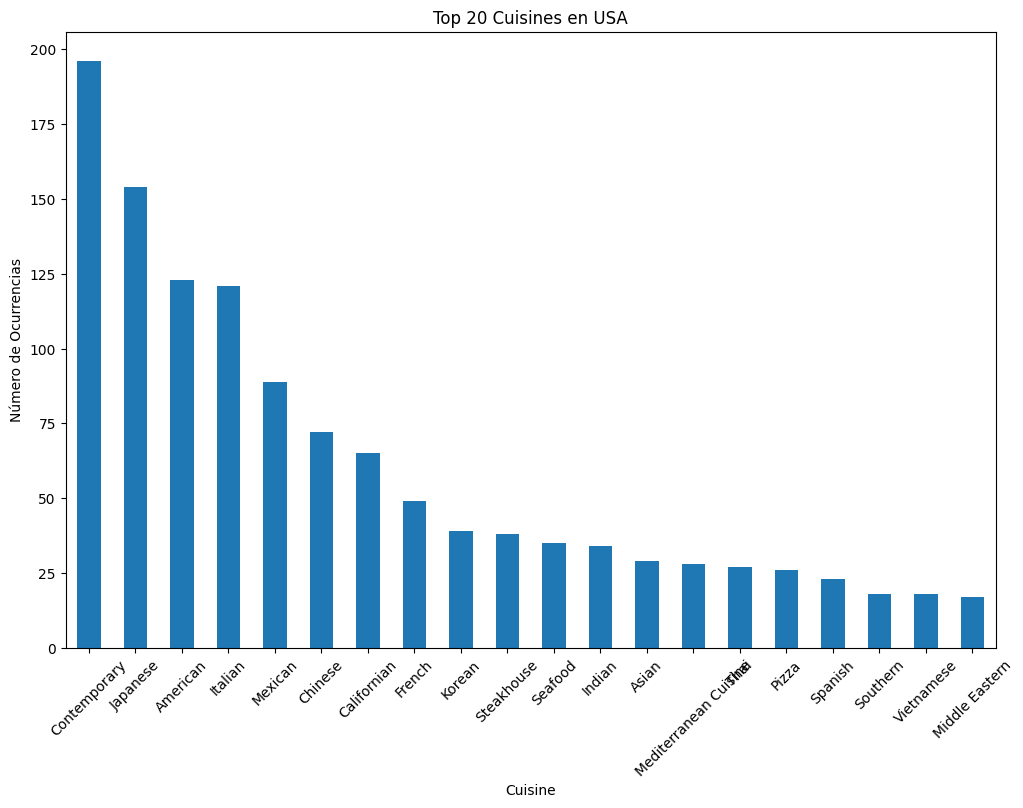

In [ ]:
# Contar el número de ocurrencias por cuisine
cuisine_counts = usa_data['Cuisine'].value_counts()

# Tomar solo el top 20 de las cocinas
top_20_cuisines = cuisine_counts.head(20)

# Crear una gráfica de barras para mostrar las ocurrencias por cuisine
plt.figure(figsize=(12, 8))
top_20_cuisines.sort_values(ascending=False).plot(kind='bar')
plt.title('Top 20 Cuisines en USA')
plt.xlabel('Cuisine')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# top por city cousine

In [ ]:
# Contar el número de ocurrencias por cuisine
cuisine_counts = usa_data['Cuisine'].value_counts()

# Tomar solo el top 20 de las cocinas
top_20_cuisines = cuisine_counts.head(20).index

# Filtrar los datos para incluir solo las filas con las cocinas del top 20
top_20_cuisine_data = usa_data[usa_data['Cuisine'].isin(top_20_cuisines)]

# Crear una tabla pivot para contar las ocurrencias de Award por cuisine
pivot_table_cuisine_awards = top_20_cuisine_data.pivot_table(index='Cuisine', columns='Award', aggfunc='size', fill_value=0)

# Añadir una columna para el total de premios y ordenar la tabla
pivot_table_cuisine_awards['Total Awards'] = pivot_table_cuisine_awards.sum(axis=1)
pivot_table_cuisine_awards_sorted = pivot_table_cuisine_awards.sort_values(by='Total Awards', ascending=False)

# Eliminar la columna 'Total Awards' antes de mostrar
pivot_table_cuisine_awards_sorted = pivot_table_cuisine_awards_sorted.drop(columns='Total Awards')

# Mostrar la tabla
print(pivot_table_cuisine_awards_sorted)

Award                  1 Star  2 Stars  3 Stars  Bib Gourmand  \
Cuisine                                                         
Contemporary               60       13        7            19   
Japanese                   44        5        1            20   
American                    9        1        1            19   
Italian                     7        1        0            34   
Mexican                     5        1        0            46   
Chinese                     1        0        0            37   
Californian                11        2        0             8   
French                      8        2        0             1   
Korean                     11        2        0             8   
Steakhouse                  3        0        0             0   
Seafood                     0        1        1             6   
Indian                      3        0        0            11   
Asian                       1        0        1             9   
Mediterranean Cuisine    

# Tipo de cocinas con AWARDS 

In [ ]:
# Mostrar la tabla
print(pivot_table_cuisine_awards_sorted)

# Guardar la tabla en un archivo CSV si es necesario
pivot_table_cuisine_awards_sorted.to_csv('top_20_cuisines_awards_sorted.csv')

Award                  1 Star  2 Stars  3 Stars  Bib Gourmand  \
Cuisine                                                         
Contemporary               60       13        7            19   
Japanese                   44        5        1            20   
American                    9        1        1            19   
Italian                     7        1        0            34   
Mexican                     5        1        0            46   
Chinese                     1        0        0            37   
Californian                11        2        0             8   
French                      8        2        0             1   
Korean                     11        2        0             8   
Steakhouse                  3        0        0             0   
Seafood                     0        1        1             6   
Indian                      3        0        0            11   
Asian                       1        0        1             9   
Mediterranean Cuisine    

In [ ]:
pivot_table_cuisine_awards_sorted

Award,1 Star,2 Stars,3 Stars,Bib Gourmand,Selected Restaurants
Cuisine,,,,,
Contemporary,60,13,7,19,97
Japanese,44,5,1,20,84
American,9,1,1,19,93
Italian,7,1,0,34,79
Mexican,5,1,0,46,37
Chinese,1,0,0,37,34
Californian,11,2,0,8,44
French,8,2,0,1,38
Korean,11,2,0,8,18


In [ ]:
# Contar el número de ocurrencias por city
city_counts = usa_data['City'].value_counts()

# Tomar solo el top 20 de las ciudades
top_20_cities = city_counts.head(20).index

# Filtrar los datos para incluir solo las filas con las ciudades del top 20
top_20_city_data = usa_data[usa_data['City'].isin(top_20_cities)]

# Crear una tabla pivot para contar las ocurrencias de Cuisine por city
pivot_table_city_cuisines = top_20_city_data.pivot_table(index='City', columns='Cuisine', aggfunc='size', fill_value=0)

# Mostrar la tabla
print(pivot_table_city_cuisines)



Cuisine            Afghan  American  American Contemporary  Argentinian  \
City                                                                      
Atlanta                 0         8                      0            0   
Berkeley                0         0                      0            0   
Beverly Hills           0         0                      0            0   
Carmel-by-the-Sea       0         0                      0            0   
Chicago                 0        16                      0            0   
Denver                  0         2                      0            0   
Los Angeles             0         5                      0            1   
Miami                   0         3                      0            0   
Miami Beach             0         0                      0            1   
New York                0        22                      1            1   
Oakland                 0         2                      0            0   
Orlando                 0

In [ ]:
# Contar el número de ocurrencias por city
city_counts = usa_data['City'].value_counts()

# Tomar solo el top 20 de las ciudades
top_20_cities = city_counts.head(20).index

# Filtrar los datos para incluir solo las filas con las ciudades del top 20
top_20_city_data = usa_data[usa_data['City'].isin(top_20_cities)]

# Verificar las primeras filas del DataFrame filtrado
print(top_20_city_data.head())

# Crear una tabla pivot para contar las ocurrencias de Cuisine por city
pivot_table_city_cuisines = top_20_city_data.pivot_table(index='City', columns='Cuisine', aggfunc='size', fill_value=0)

# Añadir una columna para el total de cocinas y ordenar la tabla
pivot_table_city_cuisines['Total Cuisines'] = pivot_table_city_cuisines.sum(axis=1)
pivot_table_city_cuisines_sorted = pivot_table_city_cuisines.sort_values(by='Total Cuisines', ascending=False)

# Eliminar la columna 'Total Cuisines' antes de mostrar
pivot_table_city_cuisines_sorted = pivot_table_city_cuisines_sorted.drop(columns='Total Cuisines')

# Mostrar la tabla
print(pivot_table_city_cuisines_sorted)

                             Name                                   Address  \
117  The Inn at Little Washington    309 Middle St., Washington, 22747, USA   
118                        Per Se  10 Columbus Circle, New York, 10019, USA   
119                  Le Bernardin     155 W. 51st St., New York, 10019, USA   
120           Eleven Madison Park     11 Madison Ave., New York, 10010, USA   
121                          Masa  10 Columbus Circle, New York, 10019, USA   

          Cuisine  Longitude   Latitude    Award  GreenStar  \
117      American -78.159535  38.713477  3 Stars          1   
118  Contemporary -73.982588  40.768054  3 Stars          0   
119       Seafood -73.982230  40.761770  3 Stars          0   
120         Vegan -73.987241  40.741554  3 Stars          0   
121      Japanese -73.982340  40.768190  3 Stars          0   

                                 FacilitiesAndServices  \
117  Air conditioning,Interesting wine list,Restaur...   
118  Air conditioning,Great vi

In [ ]:
pivot_table_city_cuisines_sorted

Cuisine,Afghan,American,American Contemporary,Argentinian,Asian,Austrian,Bakery,Balkan,Barbecue,Burmese,...,Taiwanese,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vegetarian,Venezuelan,Vietnamese,Yakiniku
City,,,,,,,,,,,,,,,,,,,,,
New York,0,22,1,1,4,2,0,1,1,1,...,1,1,12,1,0,4,3,1,4,0
Chicago,0,16,0,0,1,1,0,0,0,0,...,0,0,2,0,0,1,0,0,2,0
Washington,1,12,0,0,5,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
Los Angeles,0,5,0,1,4,0,0,0,1,0,...,0,0,3,0,0,0,1,0,0,1
San Francisco,0,2,0,0,2,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
Miami,0,3,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,2,0
Orlando,0,5,0,0,3,0,0,0,1,0,...,0,0,1,0,0,0,0,0,2,0
Atlanta,0,8,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
San Diego,0,4,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Obtener los valores únicos de la columna 'City'
unique_cities = usa_data['City'].unique()

# Imprimir los valores únicos
print("Valores únicos en la columna 'City':")
print(unique_cities)

Valores únicos en la columna 'City':
['Washington' 'New York' 'Chicago' 'San Francisco' 'San Diego'
 'Healdsburg' 'Yountville' 'Miami' 'Tarrytown' 'Los Angeles' 'Oakland'
 'Hollywood' 'West Hollywood' 'Santa Monica' 'Elk' 'Tampa' 'Orlando'
 'Miami Beach' 'Winter Park' 'Surfside' 'Atlanta' 'Aspen' 'Denver'
 'Boulder' 'Los Alamos' 'Costa Mesa' 'Encino' 'Mountain View' 'San Mateo'
 'Sacramento' 'Carlsbad' 'San Anselmo' 'Paso Robles' 'Beverly Hills'
 'Carmel-by-the-Sea' 'Palo Alto' 'Atherton' 'Calistoga' 'Torrance' 'Napa'
 'Long Beach' 'Saratoga' 'Woodside' 'Redwood City' 'Rutherford'
 'Oceanside' 'Montecito' 'Geyserville' 'Saint Helena' 'Coral Gables'
 'Winter Garden' 'Irvington' 'Elmsford' 'Brooklyn' 'White Plains'
 'Hastings-on-Hudson' 'Rye' 'Pleasantville' 'Mount Kisco' 'New Rochelle'
 'Dobbs Ferry' 'Bronxville' 'Scarsdale' 'Eastchester' 'Avondale Estates'
 'Rowland Heights' 'Inglewood' 'Santa Barbara' 'Irvine' 'Los Gatos'
 'Mill Valley' 'Berkeley' 'San Jose' 'Garden Grove' 'Tustin' 'G

In [ ]:
# Obtener los valores únicos de la columna 'City'
unique_cities = usa_data['City'].unique()

# Convertir la lista de valores únicos en un DataFrame
unique_cities_df = pd.DataFrame(unique_cities, columns=['City'])

# Guardar el DataFrame en un archivo CSV
output_file_path = 'unique_cities.csv'
unique_cities_df.to_csv(output_file_path, index=False)

print(f"Valores únicos de la columna 'City' guardados en {output_file_path}")

Valores únicos de la columna 'City' guardados en unique_cities.csv


In [35]:
# Obtener las ciudades únicas
unique_cities2 = usa_data['City'].unique()

# Mostrar las ciudades únicas
print("Ciudades únicas en el archivo CSV:")
for city in unique_cities2:
    print(city)

Ciudades únicas en el archivo CSV:
Washington
New York
Chicago
San Francisco
San Diego
Healdsburg
Yountville
Miami
Tarrytown
Los Angeles
Oakland
Hollywood
West Hollywood
Santa Monica
Elk
Tampa
Orlando
Miami Beach
Winter Park
Surfside
Atlanta
Aspen
Denver
Boulder
Los Alamos
Costa Mesa
Encino
Mountain View
San Mateo
Sacramento
Carlsbad
San Anselmo
Paso Robles
Beverly Hills
Carmel-by-the-Sea
Palo Alto
Atherton
Calistoga
Torrance
Napa
Long Beach
Saratoga
Woodside
Redwood City
Rutherford
Oceanside
Montecito
Geyserville
Saint Helena
Coral Gables
Winter Garden
Irvington
Elmsford
Brooklyn
White Plains
Hastings-on-Hudson
Rye
Pleasantville
Mount Kisco
New Rochelle
Dobbs Ferry
Bronxville
Scarsdale
Eastchester
Avondale Estates
Rowland Heights
Inglewood
Santa Barbara
Irvine
Los Gatos
Mill Valley
Berkeley
San Jose
Garden Grove
Tustin
Glendale
Temple City
Alhambra
Orange
Petaluma
Albany
Bell Gardens
Monrovia
Arcadia
Fairfax
Corte Madera
El Monte
Pasadena
Hayward
Pomona
Livermore
San Gabriel
El Cerrit

In [37]:
unique_cities2

array(['Washington', 'New York', 'Chicago', 'San Francisco', 'San Diego',
       'Healdsburg', 'Yountville', 'Miami', 'Tarrytown', 'Los Angeles',
       'Oakland', 'Hollywood', 'West Hollywood', 'Santa Monica', 'Elk',
       'Tampa', 'Orlando', 'Miami Beach', 'Winter Park', 'Surfside',
       'Atlanta', 'Aspen', 'Denver', 'Boulder', 'Los Alamos',
       'Costa Mesa', 'Encino', 'Mountain View', 'San Mateo', 'Sacramento',
       'Carlsbad', 'San Anselmo', 'Paso Robles', 'Beverly Hills',
       'Carmel-by-the-Sea', 'Palo Alto', 'Atherton', 'Calistoga',
       'Torrance', 'Napa', 'Long Beach', 'Saratoga', 'Woodside',
       'Redwood City', 'Rutherford', 'Oceanside', 'Montecito',
       'Geyserville', 'Saint Helena', 'Coral Gables', 'Winter Garden',
       'Irvington', 'Elmsford', 'Brooklyn', 'White Plains',
       'Hastings-on-Hudson', 'Rye', 'Pleasantville', 'Mount Kisco',
       'New Rochelle', 'Dobbs Ferry', 'Bronxville', 'Scarsdale',
       'Eastchester', 'Avondale Estates', 'Rowland H

In [38]:
city_to_state = {
    'Washington': 'District of Columbia',
    'New York': 'New York',
    'Chicago': 'Illinois',
    'San Francisco': 'California',
    'San Diego': 'California',
    'Healdsburg': 'California',
    'Yountville': 'California',
    'Miami': 'Florida',
    'Tarrytown': 'New York',
    'Los Angeles': 'California',
    'Oakland': 'California',
    'Hollywood': 'California',
    'West Hollywood': 'California',
    'Santa Monica': 'California',
    'Elk': 'California',
    'Tampa': 'Florida',
    'Orlando': 'Florida',
    'Miami Beach': 'Florida',
    'Winter Park': 'Florida',
    'Surfside': 'Florida',
    'Atlanta': 'Georgia',
    'Aspen': 'Colorado',
    'Denver': 'Colorado',
    'Boulder': 'Colorado',
    'Los Alamos': 'New Mexico',
    'Costa Mesa': 'California',
    'Encino': 'California',
    'Mountain View': 'California',
    'San Mateo': 'California',
    'Sacramento': 'California',
    'Carlsbad': 'California',
    'San Anselmo': 'California',
    'Paso Robles': 'California',
    'Beverly Hills': 'California',
    'Carmel-by-the-Sea': 'California',
    'Palo Alto': 'California',
    'Atherton': 'California',
    'Calistoga': 'California',
    'Torrance': 'California',
    'Napa': 'California',
    'Long Beach': 'California',
    'Saratoga': 'California',
    'Woodside': 'California',
    'Redwood City': 'California',
    'Rutherford': 'California',
    'Oceanside': 'California',
    'Montecito': 'California',
    'Geyserville': 'California',
    'Saint Helena': 'California',
    'Coral Gables': 'Florida',
    'Winter Garden': 'Florida',
    'Irvington': 'New York',
    'Elmsford': 'New York',
    'Brooklyn': 'New York',
    'White Plains': 'New York',
    'Hastings-on-Hudson': 'New York',
    'Rye': 'New York',
    'Pleasantville': 'New York',
    'Mount Kisco': 'New York',
    'New Rochelle': 'New York',
    'Dobbs Ferry': 'New York',
    'Bronxville': 'New York',
    'Scarsdale': 'New York',
    'Eastchester': 'New York',
    'Avondale Estates': 'Georgia',
    'Rowland Heights': 'California',
    'Inglewood': 'California',
    'Santa Barbara': 'California',
    'Irvine': 'California',
    'Los Gatos': 'California',
    'Mill Valley': 'California',
    'Berkeley': 'California',
    'San Jose': 'California',
    'Garden Grove': 'California',
    'Tustin': 'California',
    'Glendale': 'California',
    'Temple City': 'California',
    'Alhambra': 'California',
    'Orange': 'California',
    'Petaluma': 'California',
    'Albany': 'California',
    'Bell Gardens': 'California',
    'Monrovia': 'California',
    'Arcadia': 'California',
    'Fairfax': 'California',
    'Corte Madera': 'California',
    'El Monte': 'California',
    'Pasadena': 'California',
    'Hayward': 'California',
    'Pomona': 'California',
    'Livermore': 'California',
    'San Gabriel': 'California',
    'El Cerrito': 'California',
    'Hermosa Beach': 'California',
    'Sausalito': 'California',
    'Roseville': 'California',
    'Campbell': 'California',
    'Solvang': 'California',
    'Venice': 'California',
    'Buena Park': 'California',
    'Newport Beach': 'California',
    'Rosemead': 'California',
    'Sebastopol': 'California',
    'San Juan Capistrano': 'California',
    'Sonoma': 'California',
    'Aptos': 'California',
    'Cerritos': 'California',
    'Alameda': 'California',
    'Glen Ellen': 'California',
    'San Leandro': 'California',
    'Manhattan Beach': 'California',
    'Fullerton': 'California',
    'Culver City': 'California',
    'Santa Ana': 'California',
    'Newbury Park': 'California',
    'La Puente': 'California',
    'Bronx': 'New York',
    'Gardena': 'California',
    'Katonah': 'New York',
    'Mamaroneck': 'New York',
    'Yonkers': 'New York',
    'Hartsdale': 'New York',
    'Peekskill': 'New York',
    'North Salem': 'New York',
    'Ardsley': 'New York',
    'Pound Ridge': 'New York',
    'Village of Pelham': 'New York',
    'Decatur': 'Georgia',
    'Chamblee': 'Georgia',
    'Avon': 'Colorado',
    'Vail': 'Colorado',
    'Marina del Rey': 'California',
    'Los Olivos': 'California',
    'Ojai': 'California',
    'Half Moon Bay': 'California',
    'Millbrae': 'California',
    'Seal Beach': 'California',
    'City of Industry': 'California',
    'Menlo Park': 'California',
    'Palm Springs': 'California',
    'Studio City': 'California',
    'Anaheim': 'California',
    'El Granada': 'California',
    'Monterey': 'California',
    'Carmel Valley': 'California',
    'Los Altos': 'California',
    'La Jolla': 'California',
    'Sherman Oaks': 'California',
    'Big Sur': 'California',
    'San Bruno': 'California',
    'Larkspur': 'California',
    'Inverness': 'California',
    'Pebble Beach': 'California',
    'Novato': 'California',
    'Coronado': 'California',
    'Lafayette': 'California',
    'Belmont': 'California',
    'Calabasas': 'California',
    'Boyle Heights': 'California',
    'Bodega Bay': 'California',
    'San Rafael': 'California',
    'Del Mar': 'California',
    'Laguna Beach': 'California',
    'Redondo Beach': 'California',
    'Point Reyes Station': 'California',
    'Pleasanton': 'California',
    'Rancho Santa Margarita': 'California',
    'Kentfield': 'California',
    'Huntington Beach': 'California',
    'San Carlos': 'California',
    'Vallejo': 'California',
    'Boonville': 'California',
    'Arroyo Grande': 'California',
    'San Luis Obispo': 'California',
    'Marshall': 'California',
    'Fountain Valley': 'California',
    'Forestville': 'California',
    'Rancho Palos Verdes': 'California',
    'Woodland Hills': 'California',
    'Burlingame': 'California',
    'Santa Cruz': 'California',
    'Cupertino': 'California',
    'Seaside': 'California',
}

# Leer el archivo CSV
df = pd.read_csv('unique_cities.csv')

# Añadir la columna 'State' al DataFrame
df['State'] = df['City'].map(city_to_state)

# Guardar el DataFrame actualizado en un nuevo archivo CSV
df.to_csv('unique_cities_with_states.csv', index=False)

# Mostrar el DataFrame resultante
print(df)


               City                 State
0        Washington  District of Columbia
1          New York              New York
2           Chicago              Illinois
3     San Francisco            California
4         San Diego            California
..              ...                   ...
178  Woodland Hills            California
179      Burlingame            California
180      Santa Cruz            California
181       Cupertino            California
182         Seaside            California

[183 rows x 2 columns]


In [39]:
# Leer los archivos CSV
unique_cities_df = pd.read_csv('unique_cities.csv')
usa_data_df = pd.read_csv('usa_data.csv')

# Crear el diccionario que mapea las ciudades a los estados
city_to_state = {
    'Washington': 'District of Columbia',
    'New York': 'New York',
    'Chicago': 'Illinois',
    'San Francisco': 'California',
    'San Diego': 'California',
    'Healdsburg': 'California',
    'Yountville': 'California',
    'Miami': 'Florida',
    'Tarrytown': 'New York',
    'Los Angeles': 'California',
    'Oakland': 'California',
    'Hollywood': 'California',
    'West Hollywood': 'California',
    'Santa Monica': 'California',
    'Elk': 'California',
    'Tampa': 'Florida',
    'Orlando': 'Florida',
    'Miami Beach': 'Florida',
    'Winter Park': 'Florida',
    'Surfside': 'Florida',
    'Atlanta': 'Georgia',
    'Aspen': 'Colorado',
    'Denver': 'Colorado',
    'Boulder': 'Colorado',
    'Los Alamos': 'New Mexico',
    'Costa Mesa': 'California',
    'Encino': 'California',
    'Mountain View': 'California',
    'San Mateo': 'California',
    'Sacramento': 'California',
    'Carlsbad': 'California',
    'San Anselmo': 'California',
    'Paso Robles': 'California',
    'Beverly Hills': 'California',
    'Carmel-by-the-Sea': 'California',
    'Palo Alto': 'California',
    'Atherton': 'California',
    'Calistoga': 'California',
    'Torrance': 'California',
    'Napa': 'California',
    'Long Beach': 'California',
    'Saratoga': 'California',
    'Woodside': 'California',
    'Redwood City': 'California',
    'Rutherford': 'California',
    'Oceanside': 'California',
    'Montecito': 'California',
    'Geyserville': 'California',
    'Saint Helena': 'California',
    'Coral Gables': 'Florida',
    'Winter Garden': 'Florida',
    'Irvington': 'New York',
    'Elmsford': 'New York',
    'Brooklyn': 'New York',
    'White Plains': 'New York',
    'Hastings-on-Hudson': 'New York',
    'Rye': 'New York',
    'Pleasantville': 'New York',
    'Mount Kisco': 'New York',
    'New Rochelle': 'New York',
    'Dobbs Ferry': 'New York',
    'Bronxville': 'New York',
    'Scarsdale': 'New York',
    'Eastchester': 'New York',
    'Avondale Estates': 'Georgia',
    'Rowland Heights': 'California',
    'Inglewood': 'California',
    'Santa Barbara': 'California',
    'Irvine': 'California',
    'Los Gatos': 'California',
    'Mill Valley': 'California',
    'Berkeley': 'California',
    'San Jose': 'California',
    'Garden Grove': 'California',
    'Tustin': 'California',
    'Glendale': 'California',
    'Temple City': 'California',
    'Alhambra': 'California',
    'Orange': 'California',
    'Petaluma': 'California',
    'Albany': 'California',
    'Bell Gardens': 'California',
    'Monrovia': 'California',
    'Arcadia': 'California',
    'Fairfax': 'California',
    'Corte Madera': 'California',
    'El Monte': 'California',
    'Pasadena': 'California',
    'Hayward': 'California',
    'Pomona': 'California',
    'Livermore': 'California',
    'San Gabriel': 'California',
    'El Cerrito': 'California',
    'Hermosa Beach': 'California',
    'Sausalito': 'California',
    'Roseville': 'California',
    'Campbell': 'California',
    'Solvang': 'California',
    'Venice': 'California',
    'Buena Park': 'California',
    'Newport Beach': 'California',
    'Rosemead': 'California',
    'Sebastopol': 'California',
    'San Juan Capistrano': 'California',
    'Sonoma': 'California',
    'Aptos': 'California',
    'Cerritos': 'California',
    'Alameda': 'California',
    'Glen Ellen': 'California',
    'San Leandro': 'California',
    'Manhattan Beach': 'California',
    'Fullerton': 'California',
    'Culver City': 'California',
    'Santa Ana': 'California',
    'Newbury Park': 'California',
    'La Puente': 'California',
    'Bronx': 'New York',
    'Gardena': 'California',
    'Katonah': 'New York',
    'Mamaroneck': 'New York',
    'Yonkers': 'New York',
    'Hartsdale': 'New York',
    'Peekskill': 'New York',
    'North Salem': 'New York',
    'Ardsley': 'New York',
    'Pound Ridge': 'New York',
    'Village of Pelham': 'New York',
    'Decatur': 'Georgia',
    'Chamblee': 'Georgia',
    'Avon': 'Colorado',
    'Vail': 'Colorado',
    'Marina del Rey': 'California',
    'Los Olivos': 'California',
    'Ojai': 'California',
    'Half Moon Bay': 'California',
    'Millbrae': 'California',
    'Seal Beach': 'California',
    'City of Industry': 'California',
    'Menlo Park': 'California',
    'Palm Springs': 'California',
    'Studio City': 'California',
    'Anaheim': 'California',
    'El Granada': 'California',
    'Monterey': 'California',
    'Carmel Valley': 'California',
    'Los Altos': 'California',
    'La Jolla': 'California',
    'Sherman Oaks': 'California',
    'Big Sur': 'California',
    'San Bruno': 'California',
    'Larkspur': 'California',
    'Inverness': 'California',
    'Pebble Beach': 'California',
    'Novato': 'California',
    'Coronado': 'California',
    'Lafayette': 'California',
    'Belmont': 'California',
    'Calabasas': 'California',
    'Boyle Heights': 'California',
    'Bodega Bay': 'California',
    'San Rafael': 'California',
    'Del Mar': 'California',
    'Laguna Beach': 'California',
    'Redondo Beach': 'California',
    'Point Reyes Station': 'California',
    'Pleasanton': 'California',
    'Rancho Santa Margarita': 'California',
    'Kentfield': 'California',
    'Huntington Beach': 'California',
    'San Carlos': 'California',
    'Vallejo': 'California',
    'Boonville': 'California',
    'Arroyo Grande': 'California',
    'San Luis Obispo': 'California',
    'Marshall': 'California',
    'Fountain Valley': 'California',
    'Forestville': 'California',
    'Rancho Palos Verdes': 'California',
    'Woodland Hills': 'California',
    'Burlingame': 'California',
    'Santa Cruz': 'California',
    'Cupertino': 'California',
    'Seaside': 'California',
}

# Añadir la columna 'State' al DataFrame unique_cities_df
unique_cities_df['State'] = unique_cities_df['City'].map(city_to_state)

# Unir los DataFrames en la columna 'City'
merged_df = pd.merge(usa_data_df, unique_cities_df[['City', 'State']], on='City', how='left')

# Guardar el DataFrame resultante en un nuevo archivo CSV
merged_df.to_csv('usa_data_with_states.csv', index=False)

# Mostrar el DataFrame resultante
print(merged_df)


                                 Name  \
0        The Inn at Little Washington   
1                              Per Se   
2                        Le Bernardin   
3                 Eleven Madison Park   
4                                Masa   
...                               ...   
1470  Gusto Handcrafted Pasta & Pizza   
1471                          Sorella   
1472                         Sushi ii   
1473                     Cafe La Haye   
1474                           Solbar   

                                                Address           Cuisine  \
0                309 Middle St., Washington, 22747, USA          American   
1              10 Columbus Circle, New York, 10019, USA      Contemporary   
2                 155 W. 51st St., New York, 10019, USA           Seafood   
3                 11 Madison Ave., New York, 10010, USA             Vegan   
4              10 Columbus Circle, New York, 10019, USA          Japanese   
...                                          

In [41]:
# Leer el archivo CSV con la columna 'State' añadida
df = pd.read_csv('usa_data_with_states.csv')

# Contar el número de restaurantes por estado
restaurant_counts = df['State'].value_counts().reset_index()

# Renombrar las columnas para mayor claridad
restaurant_counts.columns = ['State', 'Restaurant Count']

# Ordenar los estados por el número de restaurantes de mayor a menor
restaurant_counts = restaurant_counts.sort_values(by='Restaurant Count', ascending=False)

# Mostrar el DataFrame resultante
print(restaurant_counts)

                  State  Restaurant Count
0            California               583
1              New York               410
2              Illinois               143
3               Florida               143
4  District of Columbia               117
5               Georgia                45
6              Colorado                33
7            New Mexico                 1


In [43]:
# Contar el número de tipos de cocina por estado
cuisine_counts = df.groupby('State')['Cuisine'].value_counts().reset_index(name='Cuisine Count')

# Ordenar los resultados por el número de tipos de cocina en orden descendente
cuisine_counts = cuisine_counts.sort_values(by='Cuisine Count', ascending=False)

# Mostrar el DataFrame resultante
print(cuisine_counts)

          State           Cuisine  Cuisine Count
0    California          Japanese             74
2    California      Contemporary             65
1    California       Californian             65
209    New York      Contemporary             55
3    California           Italian             48
..          ...               ...            ...
140     Florida          Filipino              1
141     Florida         Gastropub              1
142     Florida  Italian-American              1
143     Florida               Lao              1
269    New York        Venezuelan              1

[270 rows x 3 columns]


In [44]:

# Contar el número de premios por estado
award_counts = df.groupby('State')['Award'].value_counts().reset_index(name='Award Count')

# Ordenar los resultados por el número de premios en orden descendente
award_counts = award_counts.sort_values(by='Award Count', ascending=False)

# Mostrar el DataFrame resultante
print(award_counts)

                   State                 Award  Award Count
0             California  Selected Restaurants          364
26              New York  Selected Restaurants          241
1             California          Bib Gourmand          137
27              New York          Bib Gourmand          101
13               Florida  Selected Restaurants           84
20              Illinois  Selected Restaurants           79
2             California                1 Star           64
8   District of Columbia  Selected Restaurants           63
28              New York                1 Star           51
21              Illinois          Bib Gourmand           45
14               Florida          Bib Gourmand           33
17               Georgia  Selected Restaurants           30
9   District of Columbia          Bib Gourmand           29
15               Florida                1 Star           25
5               Colorado  Selected Restaurants           21
10  District of Columbia                

In [45]:
from scipy.stats import chi2_contingency

# Leer el archivo CSV con las columnas 'Award' y 'Price Level'
df = pd.read_csv('usa_data_with_states.csv')

# Crear una tabla de contingencia de 'Award' y 'Price Level'
contingency_table = pd.crosstab(df['Award'], df['Price Level'])

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Mostrar los resultados de la prueba de chi-cuadrado
print("Tabla de Contingencia:")
print(contingency_table)
print("\nResultados de la Prueba de Chi-Cuadrado:")
print(f"Chi-cuadrado: {chi2}")
print(f"Grados de libertad: {dof}")
print(f"Valor p: {p}")

# Interpretación del valor p
alpha = 0.05
if p < alpha:
    print("\nHay una dependencia significativa entre Award y Price Level (rechazar H0)")
else:
    print("\nNo hay una dependencia significativa entre Award y Price Level (no rechazar H0)")

Tabla de Contingencia:
Price Level            1    2    3    4
Award                                  
1 Star                 0    3   23  160
2 Stars                0    0    0   32
3 Stars                0    0    0   13
Bib Gourmand          40  309   13    0
Selected Restaurants  37  227  412  206

Resultados de la Prueba de Chi-Cuadrado:
Chi-cuadrado: 993.8468312106447
Grados de libertad: 12
Valor p: 3.94050393849315e-205

Hay una dependencia significativa entre Award y Price Level (rechazar H0)


Interpretación del Valor p:

El valor p obtenido es extremadamente pequeño (3.94e-205), mucho menor que el nivel de significancia comúnmente usado de 0.05.
Esto sugiere que hay una fuerte evidencia contra la hipótesis nula de independencia.
Conclusión:

Hay una dependencia significativa entre Award y Price Level (rechazar H0).
Esto significa que el tipo de premio (Award) depende significativamente del nivel de precios (Price Level).

In [46]:
 #Crear una tabla de contingencia de 'Award' y 'State'
contingency_table2 = pd.crosstab(df['Award'], df['State'])

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table2)

# Mostrar los resultados de la prueba de chi-cuadrado
print("Tabla de Contingencia:")
print(contingency_table2)
print("\nResultados de la Prueba de Chi-Cuadrado:")
print(f"Chi-cuadrado: {chi2}")
print(f"Grados de libertad: {dof}")
print(f"Valor p: {p}")

# Interpretación del valor p
alpha = 0.05
if p < alpha:
    print("\nHay una dependencia significativa entre Award y State (rechazar H0)")
else:
    print("\nNo hay una dependencia significativa entre Award y State (no rechazar H0)")

Tabla de Contingencia:
State                 California  Colorado  District of Columbia  Florida  \
Award                                                                       
1 Star                        64         5                    21       25   
2 Stars                       12         0                     3        1   
3 Stars                        6         0                     1        0   
Bib Gourmand                 137         7                    29       33   
Selected Restaurants         364        21                    63       84   

State                 Georgia  Illinois  New Mexico  New York  
Award                                                          
1 Star                      5        14           1        51  
2 Stars                     0         3           0        13  
3 Stars                     0         2           0         4  
Bib Gourmand               10        45           0       101  
Selected Restaurants       30        79           0  

el STATE NO INFLUYE A QUE TENGA UN AWARD

In [47]:
# Crear una tabla de contingencia de 'Award' y 'Cuisine'
contingency_table3 = pd.crosstab(df['Award'], df['Cuisine'])

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table3)

# Mostrar los resultados de la prueba de chi-cuadrado
analysis_results = {
    "Chi-cuadrado": chi2,
    "Grados de libertad": dof,
    "Valor p": p
}

# Mostrar la tabla de contingencia y los resultados de la prueba de chi-cuadrado
contingency_table3, analysis_results

(Cuisine               Afghan  American  American Contemporary  Argentinian  \
 Award                                                                        
 1 Star                     0         9                      0            0   
 2 Stars                    0         1                      0            0   
 3 Stars                    0         1                      0            0   
 Bib Gourmand               1        19                      0            0   
 Selected Restaurants       0        93                      1            3   
 
 Cuisine               Armenian  Asian  Austrian  Bakery  Balkan  Barbecue  \
 Award                                                                       
 1 Star                       0      1         0       0       0         0   
 2 Stars                      0      0         0       0       0         0   
 3 Stars                      0      1         0       0       0         0   
 Bib Gourmand                 0      9         1       

Interpretación del Valor p:

Con un valor p de 5.114e-23, que es extremadamente pequeño y menor que el nivel de significancia comúnmente usado de 0.05, podemos rechazar la hipótesis nula.
Esto sugiere que hay una fuerte evidencia contra la hipótesis nula de independencia entre Award y Cuisine.
Conclusión:

Hay una dependencia significativa entre Award y Cuisine (rechazar H0).
Esto significa que el tipo de premio (Award) está significativamente relacionado con el tipo de cocina (Cuisine) en tu conjunto de datos. Esta dependencia puede reflejar que ciertos tipos de cocina son más propensos a recibir ciertos tipos de premios.

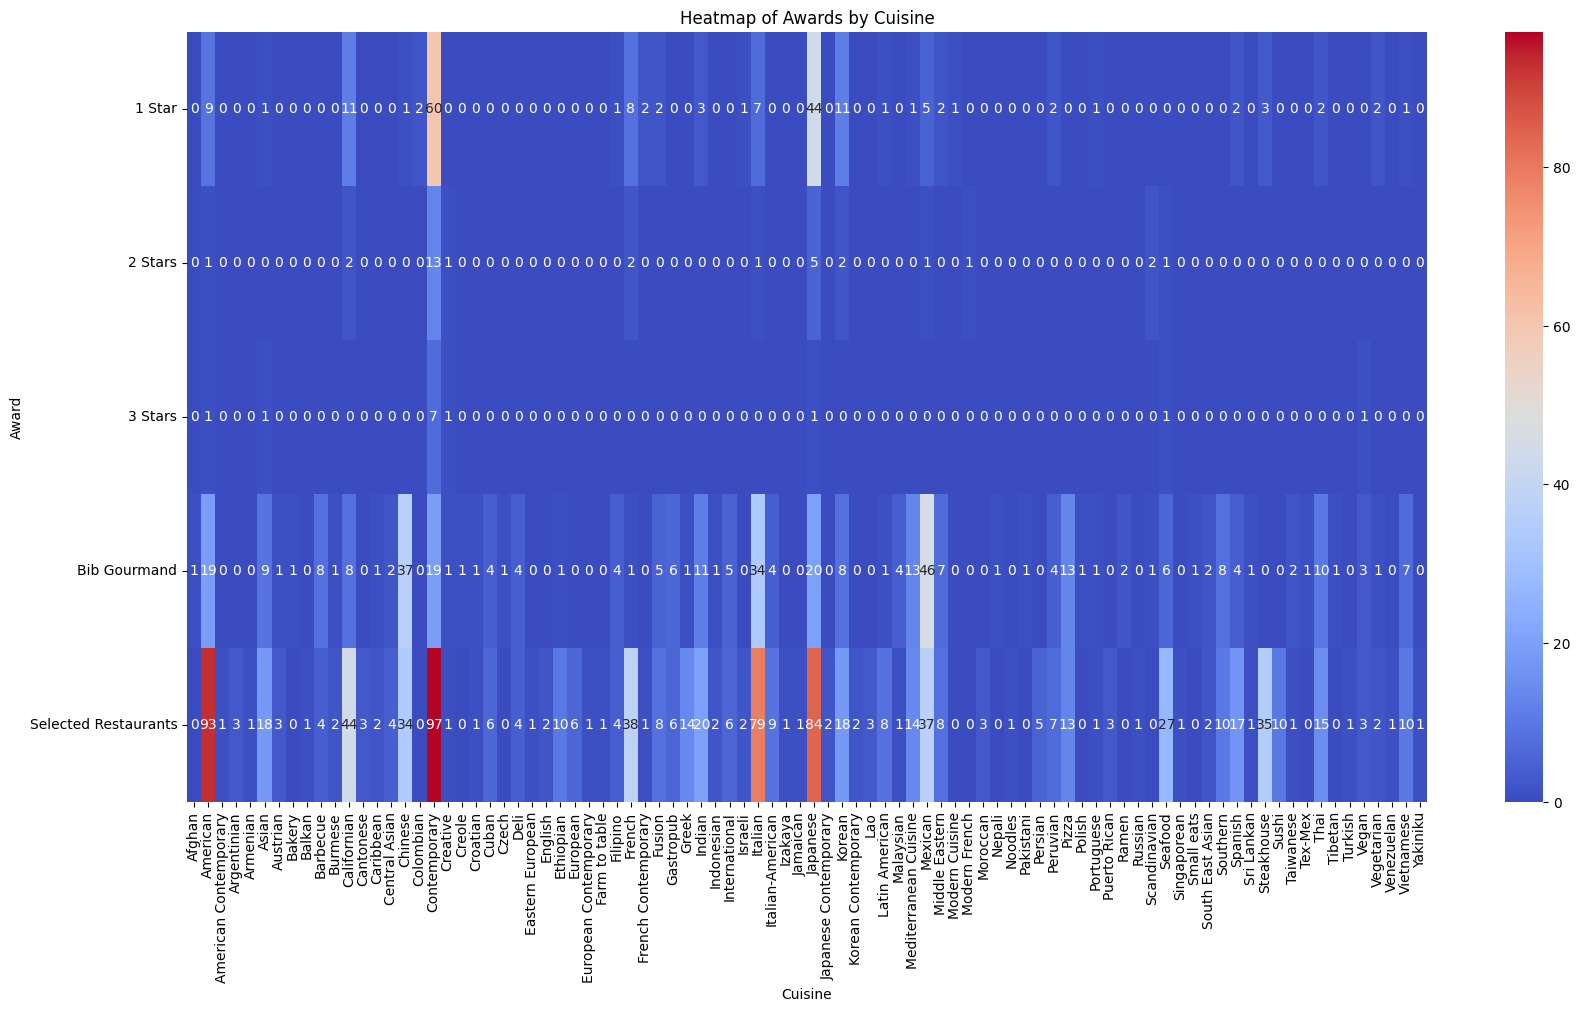

In [48]:

# Crear una tabla de contingencia de 'Award' y 'Cuisine'
contingency_table3 = pd.crosstab(df['Award'], df['Cuisine'])

# Crear un gráfico de calor
plt.figure(figsize=(20, 10))
sns.heatmap(contingency_table3, cmap='coolwarm', annot=True, fmt='d')
plt.title('Heatmap of Awards by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Award')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

C:\Users\Edgar\AppData\Local\Temp\ipykernel_12100\1677310.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_cuisines.index, y=top_5_cuisines.values, palette='viridis')


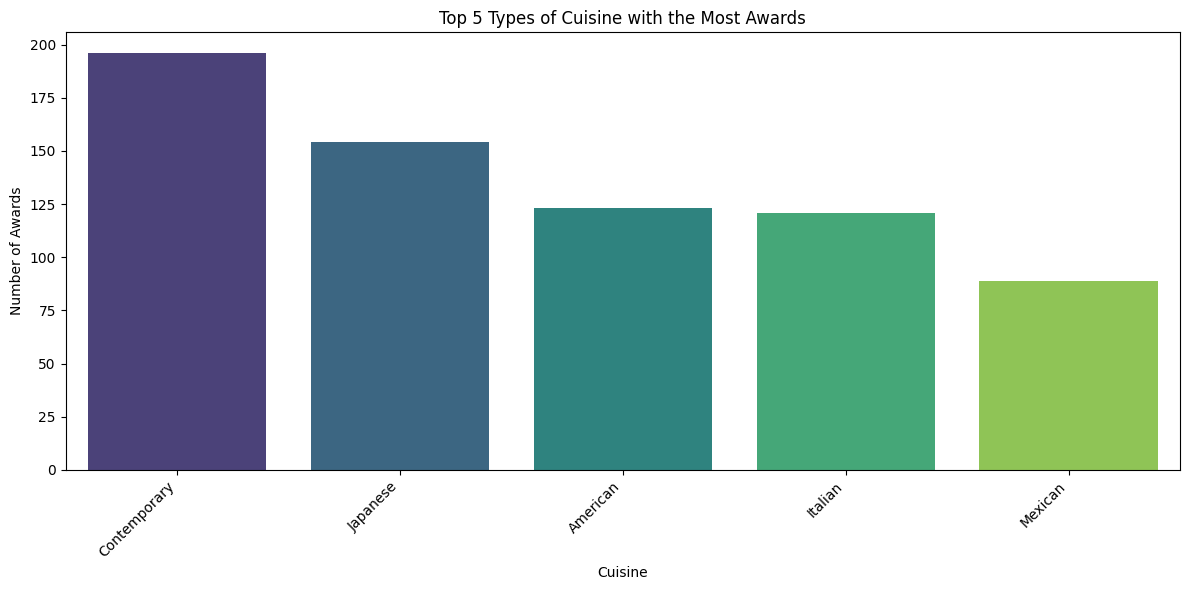

In [49]:

# Crear una tabla de contingencia de 'Award' y 'Cuisine'
contingency_table3 = pd.crosstab(df['Award'], df['Cuisine'])

# Calcular el total de premios para cada tipo de cocina
total_awards_per_cuisine = contingency_table3.sum(axis=0)

# Identificar los top 5 tipos de cocina con más premios
top_5_cuisines = total_awards_per_cuisine.sort_values(ascending=False).head(5)

# Visualizar estos resultados en un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_cuisines.index, y=top_5_cuisines.values, palette='viridis')
plt.title('Top 5 Types of Cuisine with the Most Awards')
plt.xlabel('Cuisine')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Edgar\AppData\Local\Temp\ipykernel_12100\1574817151.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_cuisines.index, y=top_5_cuisines.values, palette='viridis')


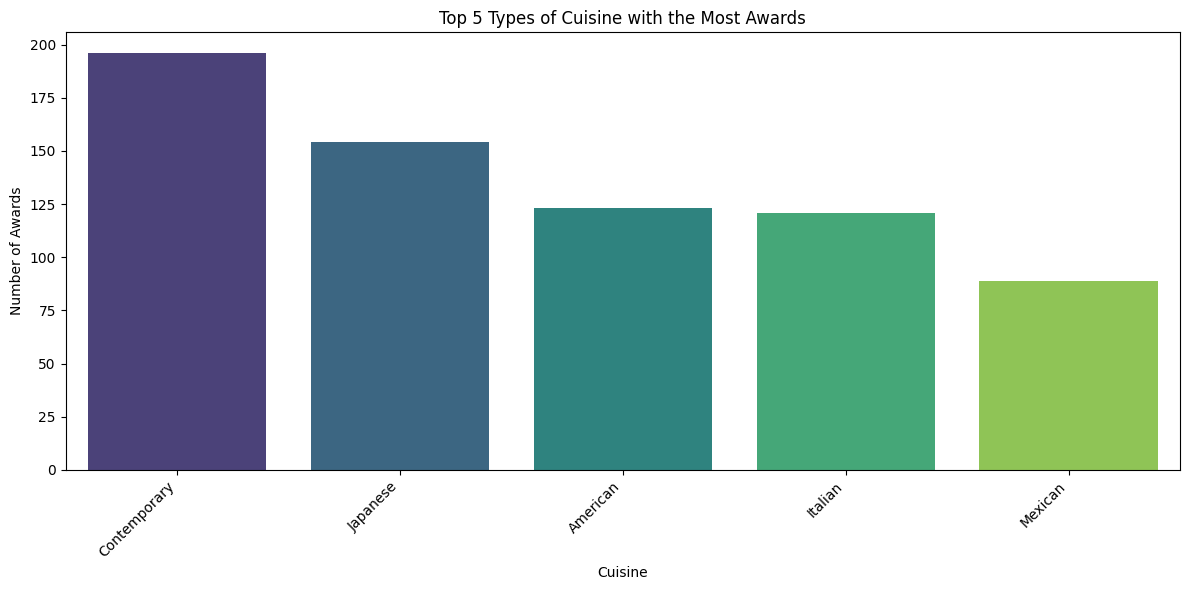

C:\Users\Edgar\AppData\Local\Temp\ipykernel_12100\1574817151.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_states.index, y=top_5_states.values, palette='viridis')


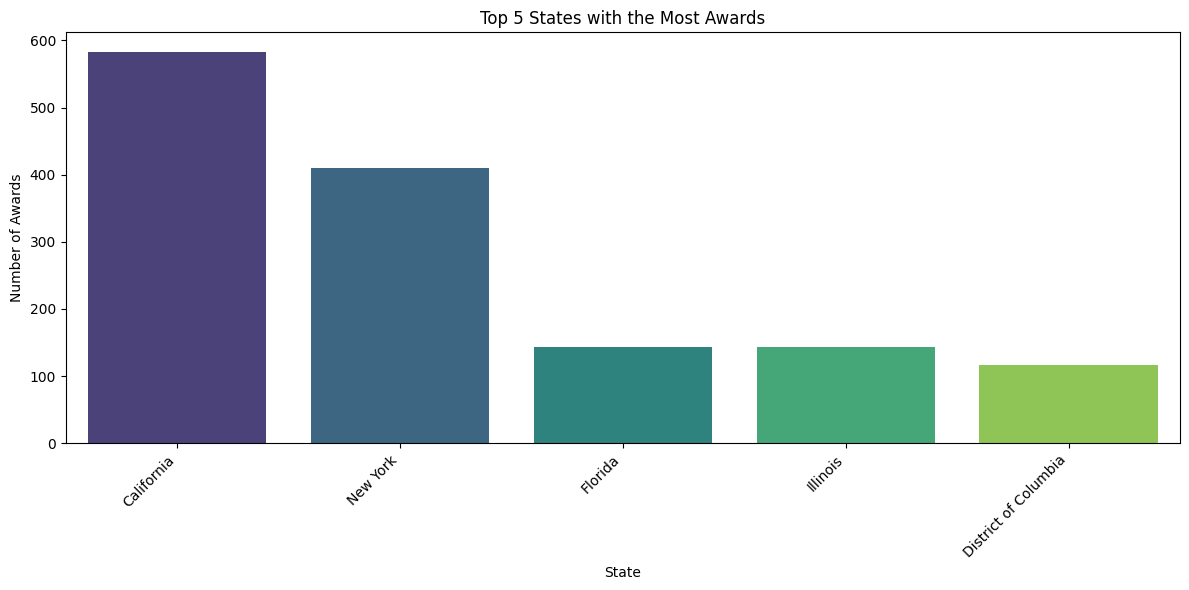

In [50]:
# Crear una tabla de contingencia de 'Award' y 'Cuisine'
contingency_table_cuisine = pd.crosstab(df['Award'], df['Cuisine'])

# Calcular el total de premios para cada tipo de cocina
total_awards_per_cuisine = contingency_table_cuisine.sum(axis=0)

# Identificar los top 5 tipos de cocina con más premios
top_5_cuisines = total_awards_per_cuisine.sort_values(ascending=False).head(5)

# Crear una tabla de contingencia de 'Award' y 'State'
contingency_table_state = pd.crosstab(df['Award'], df['State'])

# Calcular el total de premios para cada estado
total_awards_per_state = contingency_table_state.sum(axis=0)

# Identificar los top 5 estados con más premios
top_5_states = total_awards_per_state.sort_values(ascending=False).head(5)

# Visualizar el top 5 de tipos de cocina con más premios en un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_cuisines.index, y=top_5_cuisines.values, palette='viridis')
plt.title('Top 5 Types of Cuisine with the Most Awards')
plt.xlabel('Cuisine')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualizar el top 5 de estados con más premios en un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_states.index, y=top_5_states.values, palette='viridis')
plt.title('Top 5 States with the Most Awards')
plt.xlabel('State')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()